In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv(r"D:\Biblioteca\Documents\Machine_Learning\pre_processamento_dados\parte 2\base_censo.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Visualização dos dados

In [7]:
# Aqui estou usando o Numpy para retornar os tipos que a coluna objetivo (A que vou usar para treinar a classificação)
# tem e para saber a quantidade de cada um

np.unique(df['income'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([24720,  7841]))

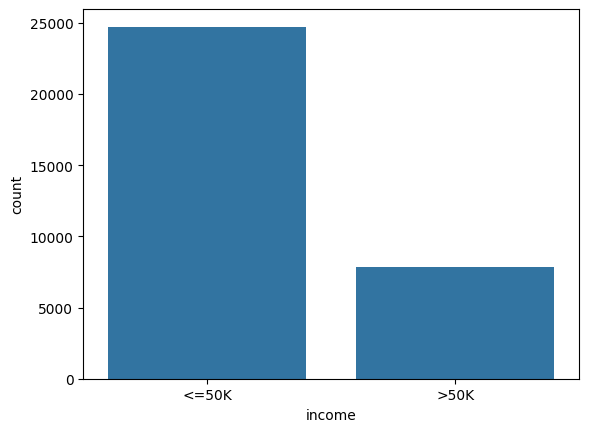

In [8]:
# Visualização da distribuição dos tipos da coluna objetivo

sns.countplot(x=df['income']);

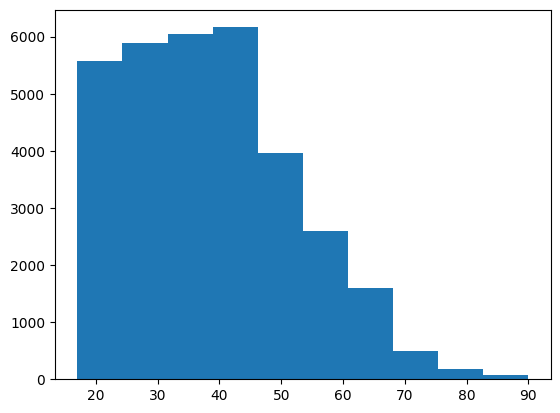

In [9]:
# Verificando a distribuição de pessoas por idade

plt.hist(x=df['age']);

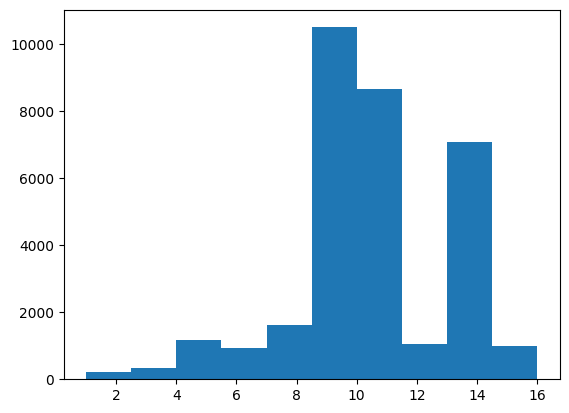

In [10]:
# Verificando a distribuição de pessoas por a quantidade de anos que as pessoas estudam

plt.hist(x=df['education.num']);

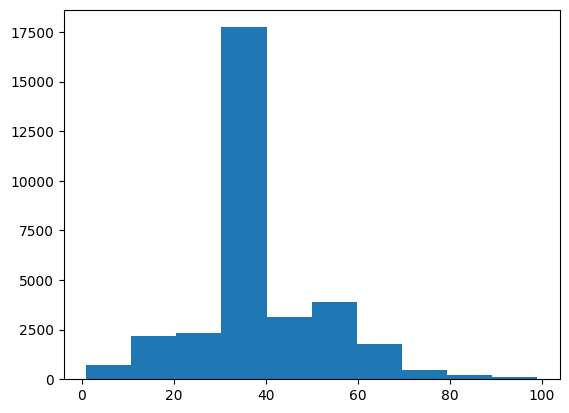

In [11]:
# Visualização da distribuição da hora trabalhada por semana

plt.hist(x=df['hours.per.week']);

Gráfico iterativo que demonstra a quantidade de pessoas por categoria da coluna indicada

In [12]:
# Aqui mostra um gráfico com informações das colunas por tipos. Também tem como agregar informações para resultados mais especificos

import plotly.io as pio
pio.renderers.default = "browser"

grafico = px.treemap(df, path=['workclass', 'age'])
grafico.show()


In [ ]:
import plotly.io as pio
pio.renderers.default = "browser"

grafico = px.treemap(df, path=['occupation', 'relationship', 'age'])
grafico.show()

# Divisão entre previsores e classe

Lembrando que a coluna objetivo (Classe) é a coluna income

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [15]:
X_census = df.iloc[:, 0:14].values

In [16]:
y_census = df.iloc[:, 14].values

# Atributos categóricos

-----------------------------------------------------------------------------

LabelEncoder - Ele basicamente transforma cada tipo de variaveis categoricas em uma coluna em uma numeração, por exemplo:

Na coluna A = [D,D,F] logo 1,1,2

In [17]:
from sklearn.preprocessing import LabelEncoder

In [21]:
X_census[0]

array([90, '?', 77053, 'HS-grad', 9, 'Widowed', '?', 'Not-in-family',
       'White', 'Female', 0, 4356, 40, 'United-States'], dtype=object)

In [ ]:
# Selecionando apenas as inforações categóricas

label_enconder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [22]:
X_census[:,1] = label_enconder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [23]:
X_census[0]

array([90, 0, 77053, 11, 9, 6, 0, 1, 4, 0, 0, 4356, 40, 39], dtype=object)

O Label Encoder funciona melher quando se tem dados categóricos ordinais, pois conforme vai tendo mais tipos nas colunas, a numeração pode ficar muito grande, além disto, quando for treinar o modelo pode entender que se um numero for maior que o outro, ele pode ser mais importante, e por isso só pode ser aplicado a dados categóricos ordinais

-----------------------------------------------------------------------------